<a href="https://colab.research.google.com/github/rohitrv8922/Speech-Emotion-Recognition/blob/main/Speech_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SPEECH EMOTION RECOGNITION
**TABLE OF CONTENTS**

1.INTRODUCTION

2.EXPLORATORY DATA ANALYSIS (EDA)

3.DATA AUGMENTATION

4.FEATURE EXTRACTION

5.MODEL

#INTRODUCTION

Verbal Communication is valuable and sought after in workplace and classroom environments alike. There is no denying the notion that Indians lack verbal communication and consequently lag behind in the workplace or classroom environments. This happens despite them having strong technical competencies. Clear and comprehensive speech is the vital backbone of strong communication and presentation skills. Where some occupations consist mainly of presenting, most careers require and thrive from the ability to communicate effectively. Research has shown that verbal communication remains one of the most employable skills in both the perception of employers and new graduates. Of the possible improvements to vocal presentations tone, disfluencies, and stutters, in particular, remain one of the most common and prominent factors of someone’s demonstration. Millions of people are affected by stuttering and other speech disfluencies, with the majority of the world having experienced mild stutters while communicating under stressful conditions. Research shows that mild disfluencies can be cured without medical help, just practicing speech regularly and constructive feedbacks are effective ways to improve. We, Data Scientists recognize this problem and say hello

**PROBLEM STATEMENT**

The purpose is to recognize the emotion and affective state of the speaker from his/her speech signal.

**DATA SOURCE USED**

We have used the RAVDESS dataset in this project.It is one of the more common dataset used for this excercise by others. It's well liked because of its quality of speakers, recording and it has 24 actors of different genders. Here's the filename identifiers as per the official RAVDESS website:

1.Ryerson Audio-Visual Database of Emotional Speech and Song (Ravdess)
This dataset includes around 1500 audio file input from 24 different actors. 12 male and 12 female where these actors record short audios in 8 different emotions i.e 1 = neutral, 2 = calm, 3 = happy, 4 = sad, 5 = angry, 6 = fearful, 7 = disgust, 8 = surprised. Each audio file is named in such a way that the 7th character is consistent with the different emotions that they represent.

2.Surrey Audio-Visual Expressed Emotion (Savee)
This dataset contains around 500 audio files recorded by 4 different male actors. The first two characters of the file name correspond to the different emotions that the potray.

#EXPLORATORY DATA ANALYSIS

In [39]:
import os
import re

import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import Audio
from keras import layers
from keras import models
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.python.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

import itertools

In [53]:
#Start by connecting gdrive into the google colab

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [54]:
Ravdess = '/content/drive/MyDrive/Deep_Learnin_Project/Ravdess/'
Savee = '/content/drive/MyDrive/Deep_Learnin_Project/Savee'

In [55]:
os.chdir('/content/drive/MyDrive/Deep_Learnin_Project')

**Ravdess dataset**

Emotion:

  01 = neutral
  
  02 = calm
  
  03 = happy
  
  04 = sad
  
  05 = angry
  
  06 = fearful
  
  07 = disgust
  
  08 = surprised

In [56]:
ravdess_directory_list = os.listdir(Ravdess)

emotion_df = []

for dir in ravdess_directory_list:
    actor = os.listdir(os.path.join(Ravdess, dir))
    for wav in actor:
        info = wav.partition(".wav")[0].split("-")
        #emotion = int(info[])
        emotion_df.append((emotion, os.path.join(Ravdess, dir, wav)))

Ravdess_df = pd.DataFrame.from_dict(emotion_df)
Ravdess_df.rename(columns={1 : "Path", 0 : "Emotion"}, inplace=True)

Ravdess_df.Emotion.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotion,Path
0,happy,/content/drive/MyDrive/Deep_Learnin_Project/Ra...
1,happy,/content/drive/MyDrive/Deep_Learnin_Project/Ra...
2,happy,/content/drive/MyDrive/Deep_Learnin_Project/Ra...
3,happy,/content/drive/MyDrive/Deep_Learnin_Project/Ra...
4,happy,/content/drive/MyDrive/Deep_Learnin_Project/Ra...


**Savee dataset**

The audio files in this dataset are named in such a way that the prefix letters describes the emotion classes as follows:

'a' = 'anger'

'd' = 'disgust'

'f' = 'fear'

'h' = 'happiness'

'n' = 'neutral'

'sa' = 'sadness'

'su' = 'surprise'

In [57]:
savee_directiory_list = os.listdir(Savee)

emotion_df = []

for wav in savee_directiory_list:
    info = wav.partition(".wav")[0].split("_")[1].replace(r"[0-9]", "")
    emotion = re.split(r"[0-9]", info)[0]
    if emotion=='a':
        emotion_df.append(("angry", Savee + "/" + wav))
    elif emotion=='d':
        emotion_df.append(("disgust", Savee + "/" + wav))
    elif emotion=='f':
        emotion_df.append(("fear", Savee + "/" + wav))
    elif emotion=='h':
        emotion_df.append(("happy", Savee + "/" + wav))
    elif emotion=='n':
        emotion_df.append(("neutral", Savee + "/" + wav))
    elif emotion=='sa':
        emotion_df.append(("sad", Savee + "/" + wav))
    else:
        emotion_df.append(("surprise", Savee + "/" + wav))

Savee_df = pd.DataFrame.from_dict(emotion_df)
Savee_df.rename(columns={1 : "Path", 0 : "Emotion"}, inplace=True)

Savee_df.head()        

,Emotion,Path
0,angry,/content/drive/MyDrive/Deep_Learnin_Project/Sa...
1,angry,/content/drive/MyDrive/Deep_Learnin_Project/Sa...
2,angry,/content/drive/MyDrive/Deep_Learnin_Project/Sa...
3,angry,/content/drive/MyDrive/Deep_Learnin_Project/Sa...
4,angry,/content/drive/MyDrive/Deep_Learnin_Project/Sa...


In [58]:
# creating Dataframe using all the 2 dataframes we created so far.
data_path = pd.concat([Ravdess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.shape

(1947, 2)

In [59]:
data_path.head(10)

,Emotion,Path
0,happy,/content/drive/MyDrive/Deep_Learnin_Project/Ra...
1,happy,/content/drive/MyDrive/Deep_Learnin_Project/Ra...
2,happy,/content/drive/MyDrive/Deep_Learnin_Project/Ra...
3,happy,/content/drive/MyDrive/Deep_Learnin_Project/Ra...
4,happy,/content/drive/MyDrive/Deep_Learnin_Project/Ra...
5,happy,/content/drive/MyDrive/Deep_Learnin_Project/Ra...
6,happy,/content/drive/MyDrive/Deep_Learnin_Project/Ra...
7,happy,/content/drive/MyDrive/Deep_Learnin_Project/Ra...
8,happy,/content/drive/MyDrive/Deep_Learnin_Project/Ra...
9,happy,/content/drive/MyDrive/Deep_Learnin_Project/Ra...


#Data Visualisation and Exploration

First let's plot the count of each emotions in our dataset.

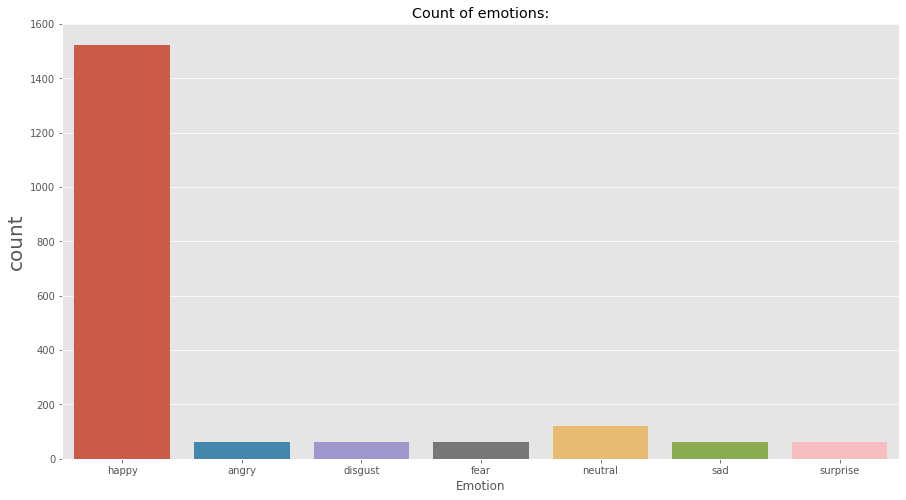

In [60]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,8)
plt.style.use("ggplot")
plt.ylabel('Count', size=20)
plt.title("Count of emotions:")
sns.countplot(x=data_path["Emotion"])
sns.despine(top=True, right=True, left=False, bottom=False)

#We can also plot waveplots and spectograms for audio signals.



*   Waveplots - Waveplots let us know the loudness of the audio at a given time.

*   Spectograms - A spectrogram is a visual representation of the spectrum of frequencies of sound or other signals as they vary with time. It’s a representation of frequencies changing with respect to time for given audio/music signals.



In [61]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title(f'Waveplot for audio with {e} emotion', size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

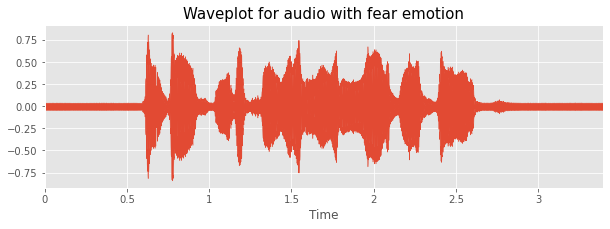

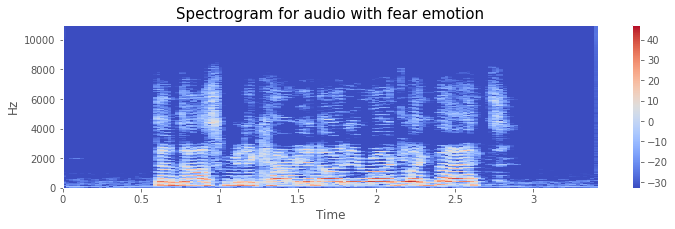

In [62]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotion==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)


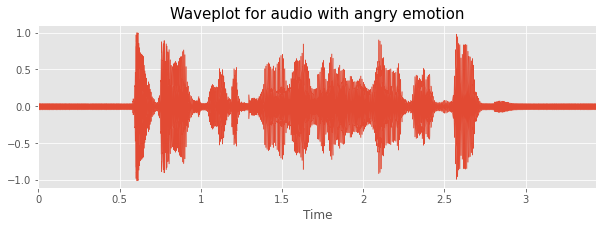

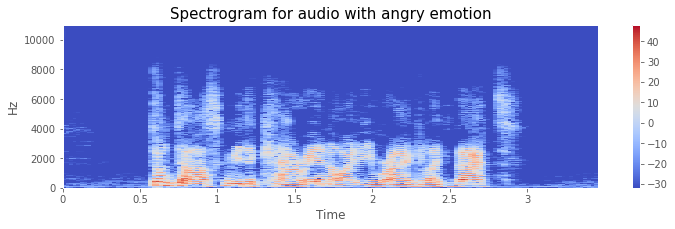

In [63]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotion==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

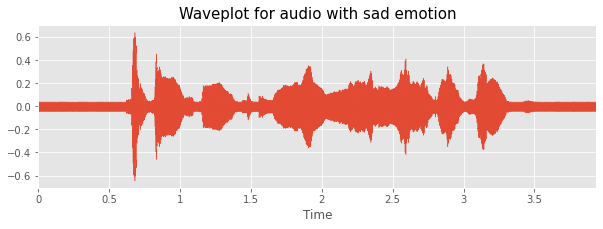

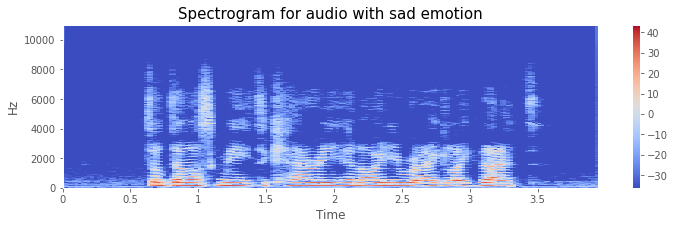

In [64]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotion==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

#Data Augmentation

Data augmentation is the process by which we create new synthetic data samples by adding small perturbations on our initial training set.

**We have some ways for data augmentation in sound data:**



*   Noise injection
*   Stretching
*   Shifting
*   Pitching





In [66]:
def noise(data, random=False, rate=0.035, threshold=0.075):
    """Add some noise to sound sample. Use random if you want to add random noise with some threshold.
    Or use rate Random=False and rate for always adding fixed noise."""
    if random:
        rate = np.random.random() * threshold
    noise_amp = rate*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    """Stretching data with some rate."""
    return librosa.effects.time_stretch(data, rate)

def shift(data, rate=1000):
    """Shifting data with some rate"""
    shift_range = int(np.random.uniform(low=-5, high = 5)*rate)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7, random=False):
    """"Add some pitch to sound sample. Use random if you want to add random pitch with some threshold.
    Or use pitch_factor Random=False and rate for always adding fixed pitch."""
    if random:
        pitch_factor=np.random.random() * pitch_factor
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)